In [156]:
import pandas as pd

In [157]:
file = 'netflix_titles[1].csv'
data1 = pd.read_csv(file)
data = data[data['year_added'] != 2021]
# loaded the data in a CSV file.

In [158]:
print(data.info())
# checking the data 
# exploring the data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7211 entries, 0 to 7210
Data columns (total 55 columns):
 #   Column                        Non-Null Count  Dtype 
---  ------                        --------------  ----- 
 0   show_id                       7211 non-null   object
 1   type                          7211 non-null   object
 2   title                         7211 non-null   object
 3   director                      7211 non-null   object
 4   cast                          7211 non-null   object
 5   country                       7211 non-null   object
 6   date_added                    7211 non-null   object
 7   release_year                  7211 non-null   int64 
 8   rating                        7211 non-null   object
 9   duration                      7211 non-null   object
 10  listed_in                     7211 non-null   object
 11  description                   7211 non-null   object
 12  year_added                    7211 non-null   int64 
 13  TV Action & Advent

In [159]:
print(data.head())
# viewing the first 5 columns.
print(data.describe())
data.info()
print(data.isnull().sum())

  show_id     type                           title         director  \
0   s1471    Movie                Alaska Is a Drag     Shaz Bennett   
1   s1472    Movie           Best of Stand-Up 2020          Unknown   
2   s1473    Movie                    Bobby Jasoos     Samar Shaikh   
3   s1474  TV Show  Chilling Adventures of Sabrina          Unknown   
4   s1475    Movie                   Tarung Sarung  Archie Hekagery   

                                                cast        country  \
0  Martin L. Washington Jr., Maya Washington, Mat...  United States   
1  Jerry Seinfeld, Leslie Jones, Taylor Tomlinson...        Unknown   
2  Vidya Balan, Ali Fazal, Supriya Pathak, Tanvi ...          India   
3  Kiernan Shipka, Ross Lynch, Miranda Otto, Lucy...  United States   
4  Panji Zoni, Yayan Ruhian, Maizura, Cemal Faruk...      Indonesia   

   date_added  release_year rating   duration  ... TV Dramas TV Horror  \
0  2020-12-31          2017  TV-MA     83 min  ...         0         0  

In [160]:
data['date_added'] = pd.to_datetime(data['date_added'], errors='coerce') # converting date_added to date time format.
data.dropna(subset=['date_added'], inplace=True) # dropping the missing rows
data['year_added'] = data['date_added'].dt.year # new coloumn 'year_added' is created.
print(data.head())# printing the first 5 coloumns

  show_id     type                           title         director  \
0   s1471    Movie                Alaska Is a Drag     Shaz Bennett   
1   s1472    Movie           Best of Stand-Up 2020          Unknown   
2   s1473    Movie                    Bobby Jasoos     Samar Shaikh   
3   s1474  TV Show  Chilling Adventures of Sabrina          Unknown   
4   s1475    Movie                   Tarung Sarung  Archie Hekagery   

                                                cast        country  \
0  Martin L. Washington Jr., Maya Washington, Mat...  United States   
1  Jerry Seinfeld, Leslie Jones, Taylor Tomlinson...        Unknown   
2  Vidya Balan, Ali Fazal, Supriya Pathak, Tanvi ...          India   
3  Kiernan Shipka, Ross Lynch, Miranda Otto, Lucy...  United States   
4  Panji Zoni, Yayan Ruhian, Maizura, Cemal Faruk...      Indonesia   

  date_added  release_year rating   duration  ... TV Dramas TV Horror  \
0 2020-12-31          2017  TV-MA     83 min  ...         0         0   


In [161]:
print(data.isnull().sum())
# checking if it worked

show_id                         0
type                            0
title                           0
director                        0
cast                            0
country                         0
date_added                      0
release_year                    0
rating                          0
duration                        0
listed_in                       0
description                     0
year_added                      0
TV Action & Adventure           0
Science & Nature TV             0
Cult Movies                     0
International TV Shows          0
Documentaries                   0
TV Thrillers                    0
Reality TV                      0
Children & Family Movies        0
Classic & Cult TV               0
Stand-Up Comedy & Talk Shows    0
International Movies            0
Teen TV Shows                   0
Romantic Movies                 0
Anime Series                    0
Anime Features                  0
Action & Adventure              0
Stand-Up Comed

In [162]:
unique_genres = set()   # empty set to save all unique generes.
for genres in data['listed_in']:
    for genre in genres.split(', '):  
        unique_genres.add(genre.strip())

In [163]:
for genre in unique_genres:
    data[genre] = data['listed_in'].apply(lambda x: 1 if genre in x else 0)
    # creating a newcoloumn fore each genre. 

In [164]:
data['release_year'] = data['release_year'].astype(int) # making sure release_year in in int form.

In [165]:
print(data.head())

  show_id     type                           title         director  \
0   s1471    Movie                Alaska Is a Drag     Shaz Bennett   
1   s1472    Movie           Best of Stand-Up 2020          Unknown   
2   s1473    Movie                    Bobby Jasoos     Samar Shaikh   
3   s1474  TV Show  Chilling Adventures of Sabrina          Unknown   
4   s1475    Movie                   Tarung Sarung  Archie Hekagery   

                                                cast        country  \
0  Martin L. Washington Jr., Maya Washington, Mat...  United States   
1  Jerry Seinfeld, Leslie Jones, Taylor Tomlinson...        Unknown   
2  Vidya Balan, Ali Fazal, Supriya Pathak, Tanvi ...          India   
3  Kiernan Shipka, Ross Lynch, Miranda Otto, Lucy...  United States   
4  Panji Zoni, Yayan Ruhian, Maizura, Cemal Faruk...      Indonesia   

  date_added  release_year rating   duration  ... TV Dramas TV Horror  \
0 2020-12-31          2017  TV-MA     83 min  ...         0         0   


In [166]:
print(data.isnull().sum())

show_id                         0
type                            0
title                           0
director                        0
cast                            0
country                         0
date_added                      0
release_year                    0
rating                          0
duration                        0
listed_in                       0
description                     0
year_added                      0
TV Action & Adventure           0
Science & Nature TV             0
Cult Movies                     0
International TV Shows          0
Documentaries                   0
TV Thrillers                    0
Reality TV                      0
Children & Family Movies        0
Classic & Cult TV               0
Stand-Up Comedy & Talk Shows    0
International Movies            0
Teen TV Shows                   0
Romantic Movies                 0
Anime Series                    0
Anime Features                  0
Action & Adventure              0
Stand-Up Comed

In [167]:
data['director'] = data['director'].fillna('Unknown')
data['cast'] = data['cast'].fillna('Unknown')
data['country'] = data['country'].fillna('Unknown')
data['rating'] = data['rating'].fillna('Unknown')
data['duration'] = data['duration'].fillna('Unknown')

# filling the missing values with the term 'Unknown'

In [168]:
print(data.isnull().sum()) # making sure there are no missing values.

show_id                         0
type                            0
title                           0
director                        0
cast                            0
country                         0
date_added                      0
release_year                    0
rating                          0
duration                        0
listed_in                       0
description                     0
year_added                      0
TV Action & Adventure           0
Science & Nature TV             0
Cult Movies                     0
International TV Shows          0
Documentaries                   0
TV Thrillers                    0
Reality TV                      0
Children & Family Movies        0
Classic & Cult TV               0
Stand-Up Comedy & Talk Shows    0
International Movies            0
Teen TV Shows                   0
Romantic Movies                 0
Anime Series                    0
Anime Features                  0
Action & Adventure              0
Stand-Up Comed

In [169]:
# save the modified dataset to a new CSV file
data.to_csv('netflix_data_cleaned.csv', index=False)  # 'index=False' ensures that the row indices are not saved as a separate column

# saving the cleaned data in a new file.

## **1.  What are the Common Characteristics of Content Added to Netflix in 2020?  

In [170]:
data_2020 = data[data['release_year'] == 2020]  # filtering the data to only 2020
content_type_distribution = data_2020['type'].value_counts() #analysing the distrubution of the content.
print(content_type_distribution)

type
Movie      397
TV Show    384
Name: count, dtype: int64


In [171]:
genre_columns = [col for col in data.columns if col not in ['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added', 'release_year', 'rating', 'duration', 'listed_in', 'description']]
genre_counts = data_2020[genre_columns].sum().sort_values(ascending=False)
genre_counts_new=genre_counts.iloc[4:]
print(genre_counts_new)
# identifying the most common generes in 2020 and printing them.

Comedies                        201
International TV Shows          190
International Movies            156
TV Dramas                       112
TV Comedies                      94
Children & Family Movies         78
Crime TV Shows                   75
Docuseries                       68
Action & Adventure               65
Documentaries                    57
Reality TV                       52
Kids' TV                         50
Stand-Up Comedy                  48
Romantic Movies                  43
Thrillers                        40
Romantic TV Shows                37
Independent Movies               36
British TV Shows                 29
TV Action & Adventure            29
Music & Musicals                 27
Spanish-Language TV Shows        25
TV Mysteries                     24
Horror Movies                    23
Sci-Fi & Fantasy                 17
Anime Series                     17
TV Sci-Fi & Fantasy              16
TV Horror                        16
Korean TV Shows             

In [172]:
top_countries_2020 = data_2020['country'].value_counts()
top_countries_2020_new= data_2020['country'].value_counts().iloc[2:]
print(top_countries_2020_new)
# finding out the top contibuting countries in 2021

country
Unknown                                     53
United Kingdom                              37
South Korea                                 27
Canada                                      25
Germany                                     19
                                            ..
United States, Canada, United Kingdom        1
Uruguay                                      1
Brazil, France                               1
China, Spain, South Korea, United States     1
United States, South Korea, China            1
Name: count, Length: 87, dtype: int64


In [173]:
summary_2020 = {
    'content_type_distribution': content_type_distribution,
    'top_genres': genre_counts,
    'top_countries': top_countries_2020
}
summary_2020


{'content_type_distribution': type
 Movie      397
 TV Show    384
 Name: count, dtype: int64,
 'top_genres': year_added                      1577616
 Movies                              290
 TV Shows                            241
 Dramas                              240
 Comedies                            201
 International TV Shows              190
 International Movies                156
 TV Dramas                           112
 TV Comedies                          94
 Children & Family Movies             78
 Crime TV Shows                       75
 Docuseries                           68
 Action & Adventure                   65
 Documentaries                        57
 Reality TV                           52
 Kids' TV                             50
 Stand-Up Comedy                      48
 Romantic Movies                      43
 Thrillers                            40
 Romantic TV Shows                    37
 Independent Movies                   36
 British TV Shows             

In [174]:
def print_section(heading, data_series): ## function to neatly print sections with a heading and data.
    print(heading)
    print('-' * len(heading))  # Printing a line of dashes under the heading.

    for index, value in data_series.items():
        print(f"{index}: {value}")
    
    print()  #spacing between sections


content_types = summary_2020['content_type_distribution'] # extracting specific data
top_genres = summary_2020['top_genres']  
top_countries = summary_2020['top_countries']  


specific_genres = ['International Movies', 'Comedies', 'TV Shows', 'International TV Shows', 
                   'Action & Adventure', 'Documentaries', 'Independent Movies', 'TV Dramas', 
                   'Children & Family Movies', 'Thrillers', 'Romantic Movies', 'TV Comedies', 
                   'Crime TV Shows', 'Kids\' TV', 'Stand-Up Comedy', 'Docuseries', 
                   'Music & Musicals', 'Romantic TV Shows']

specific_countries = ['United States', 'India', 'United Kingdom', 'South Korea', 
                      'Norway, Denmark', 'Israel, United States', 
                      'United States, Czech Republic', 'Mauritius', 
                      'Canada, United States, Ireland']


filtered_genres = top_genres[top_genres.index.isin(specific_genres)] # filtering the data based.
filtered_countries = top_countries[top_countries.index.isin(specific_countries)]


content_types.index.name = None # removing the index name ('type', 'country') from the data before printing
filtered_genres.index.name = None
filtered_countries.index.name = None

print_section("Content Type Distribution", content_types)# printing the final output
print_section("Top Genres", filtered_genres)
print_section("Top Countries", filtered_countries)
             

Content Type Distribution
-------------------------
Movie: 397
TV Show: 384

Top Genres
----------
TV Shows: 241
Comedies: 201
International TV Shows: 190
International Movies: 156
TV Dramas: 112
TV Comedies: 94
Children & Family Movies: 78
Crime TV Shows: 75
Docuseries: 68
Action & Adventure: 65
Documentaries: 57
Kids' TV: 50
Stand-Up Comedy: 48
Romantic Movies: 43
Thrillers: 40
Romantic TV Shows: 37
Independent Movies: 36
Music & Musicals: 27

Top Countries
-------------
United States: 305
India: 64
United Kingdom: 37
South Korea: 27



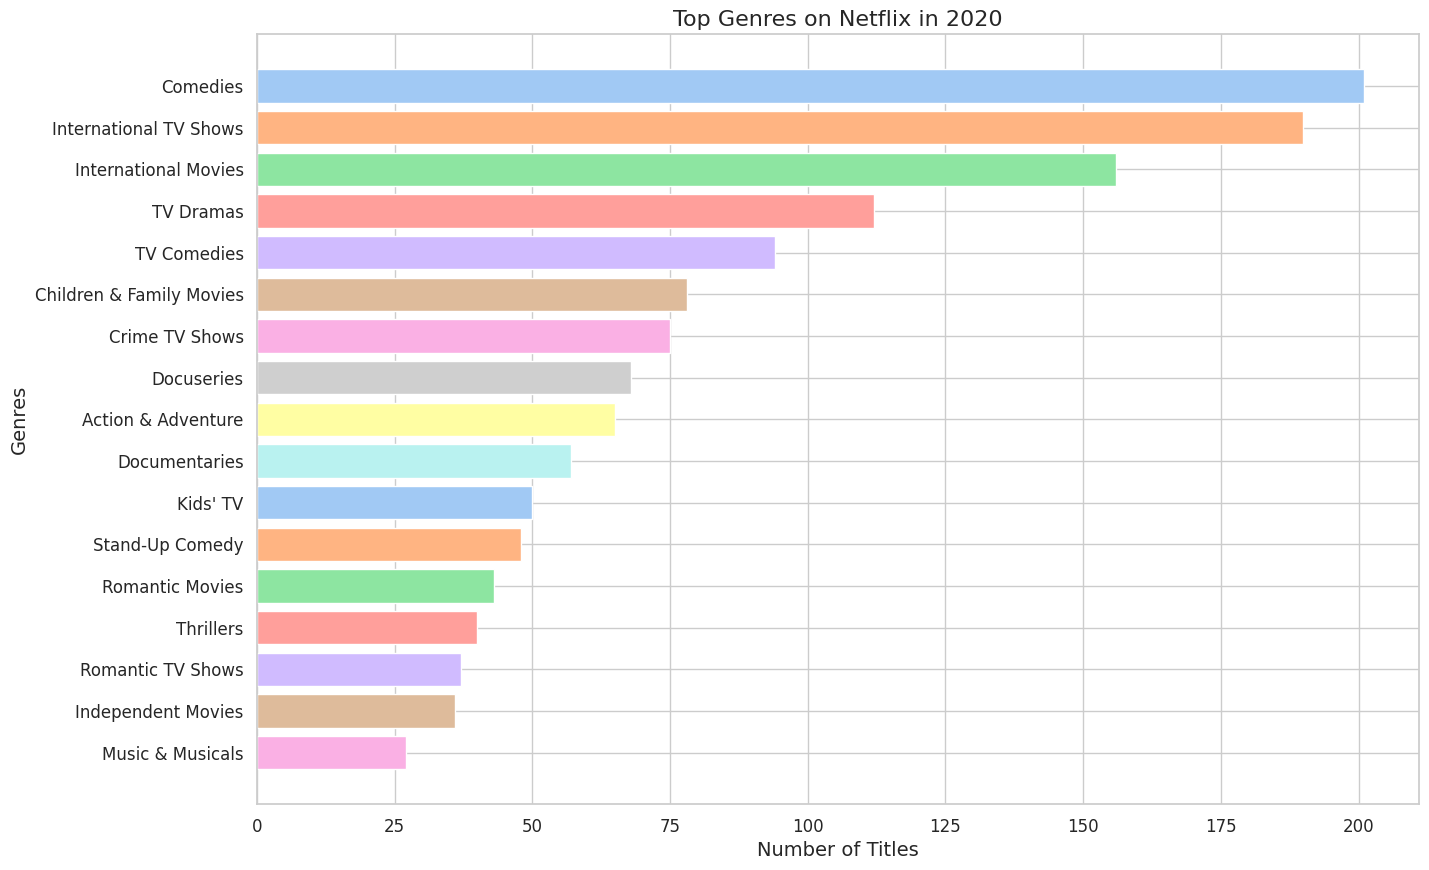

In [175]:
import matplotlib.pyplot as plt
import seaborn as sns
desired_genres = [
    'International Movies', 'Comedies', 'International TV Shows', 
    'Action & Adventure', 'Documentaries', 'Independent Movies', 'TV Dramas', 
    'Children & Family Movies', 'Thrillers', 'Romantic Movies', 'TV Comedies', 
    'Crime TV Shows', 'Kids\' TV', 'Stand-Up Comedy', 'Docuseries', 
    'Music & Musicals', 'Romantic TV Shows'
]


sns.set(style="whitegrid") # setting aesthetic parameters.

top_genres = summary_2020['top_genres'] #filtering to only include desired genres
filtered_genres = top_genres[top_genres.index.isin(desired_genres)]


genre_names = filtered_genres.index # extracting names and values
genre_counts = filtered_genres.values


pastel_palette = sns.color_palette("pastel", len(desired_genres))#using pastel color palette, one color for each.

plt.figure(figsize=(15, 10))  

plt.barh(genre_names, genre_counts, color=pastel_palette)


plt.xlabel('Number of Titles', fontsize=14)# adding labels and title
plt.ylabel('Genres', fontsize=14)
plt.title('Top Genres on Netflix in 2020', fontsize=16)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)


plt.gca().invert_yaxis() #sorting in desending order


plt.show() # displaying the final output.


## **2.How Have the Themes and Genres of Netflix Content Evolved Since the Platform's Inception?

In [92]:
data = pd.read_csv('netflix_data_cleaned.csv')

In [99]:
genres_excluding_movies = [genre for genre in unique_genres if genre != 'Movies']
genre_counts_per_year = data.groupby('year_added')[genres_excluding_movies].sum()
print(genre_counts_per_year) # finding out the sum of movies released in each genre in particular year.

            TV Action & Adventure  Science & Nature TV  Cult Movies  \
year_added                                                            
2008                            0                    0            0   
2009                            0                    0            0   
2010                            0                    0            1   
2011                            0                    0            0   
2012                            0                    0            0   
2013                            0                    0            0   
2014                            0                    0            0   
2015                            0                    3            0   
2016                            5                   10            1   
2017                           16                   19            4   
2018                           20                   11           12   
2019                           39                   16           22   
2020  

In [100]:
top_genres_over_time = genre_counts_per_year.sort_values(by='year_added', ascending=False)
print(top_genres_over_time) # finding out the top generes over time and sorted them.

            TV Action & Adventure  Science & Nature TV  Cult Movies  \
year_added                                                            
2020                           43                   16           13   
2019                           39                   16           22   
2018                           20                   11           12   
2017                           16                   19            4   
2016                            5                   10            1   
2015                            0                    3            0   
2014                            0                    0            0   
2013                            0                    0            0   
2012                            0                    0            0   
2011                            0                    0            0   
2010                            0                    0            1   
2009                            0                    0            0   
2008  

In [123]:
emerging_genres = top_genres_over_time[top_genres_over_time.index >= 2015] 
print(emerging_genres)
# finding out the emerging genres from 2010.

            TV Action & Adventure  Science & Nature TV  Cult Movies  \
year_added                                                            
2020                           43                   16           13   
2019                           39                   16           22   
2018                           20                   11           12   
2017                           16                   19            4   
2016                            5                   10            1   
2015                            0                    3            0   

            International TV Shows  Documentaries  TV Thrillers  Reality TV  \
year_added                                                                    
2020                           276            118            13          80   
2019                           331            188            12          56   
2018                           208            167             5          36   
2017                           196  

In [137]:
years = genre_counts_per_year.index.max() - genre_counts_per_year.index.min()
genre_cagr = ((genre_counts_per_year.iloc[-1] / genre_counts_per_year.iloc[0]) ** (1/years) - 1) * 100
### calculating the CAGR for each genre.###


consistent_genres = genre_counts_per_year.count()[genre_counts_per_year.count() >= 5].index
###filtering data for consistency.###


genre_cagr = genre_cagr[consistent_genres]# only keeping the consistant ones

genre_cagr = genre_cagr.replace([np.inf, -np.inf], np.nan).dropna()


top_emerging_genres = genre_cagr.sort_values(ascending=False).head(10) # finding the top genres based on CAGR

print("Top emerging genres based on consistent growth:")
print(top_emerging_genres[2:]) #Printing the result

# independent movies and thrillers have the highest growth rate.

Top emerging genres based on consistent growth:
Independent Movies              51.654445
Thrillers                       51.482596
Stand-Up Comedy                 39.856397
Stand-Up Comedy & Talk Shows    18.920712
dtype: float64


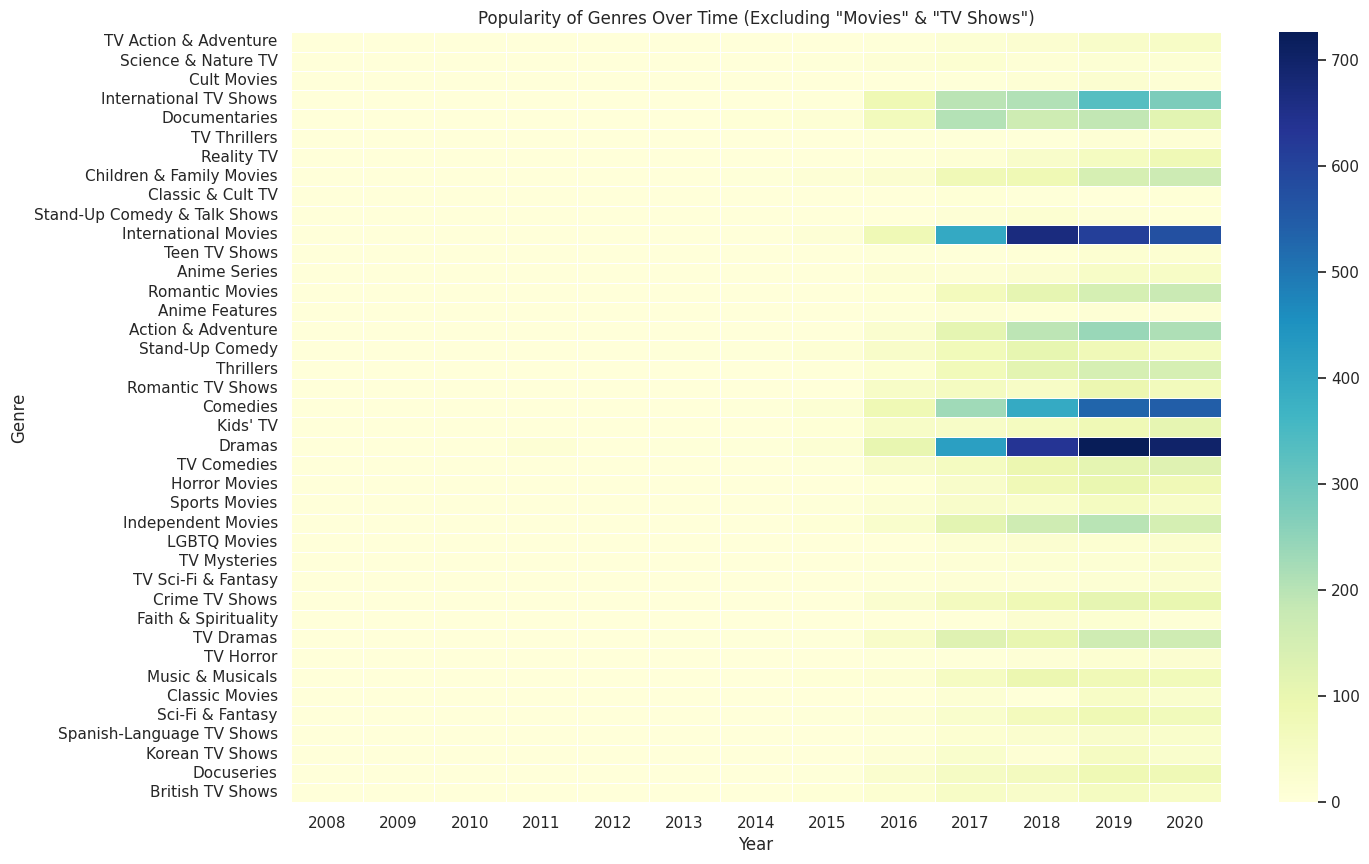

In [113]:
filtered_genres = genre_counts_per_year.drop([ 'TV Shows'], axis=1) # creating a new dataFrame without 'Movies' and 'TV Shows' columns

plt.figure(figsize=(15, 10))
sns.heatmap(filtered_genres.transpose(), cmap='YlGnBu', linewidths=0.5, cbar=True) # creating the heatmap

plt.title('Popularity of Genres Over Time (Excluding "Movies" & "TV Shows")')
plt.xlabel('Year')
plt.ylabel('Genre')
plt.show()


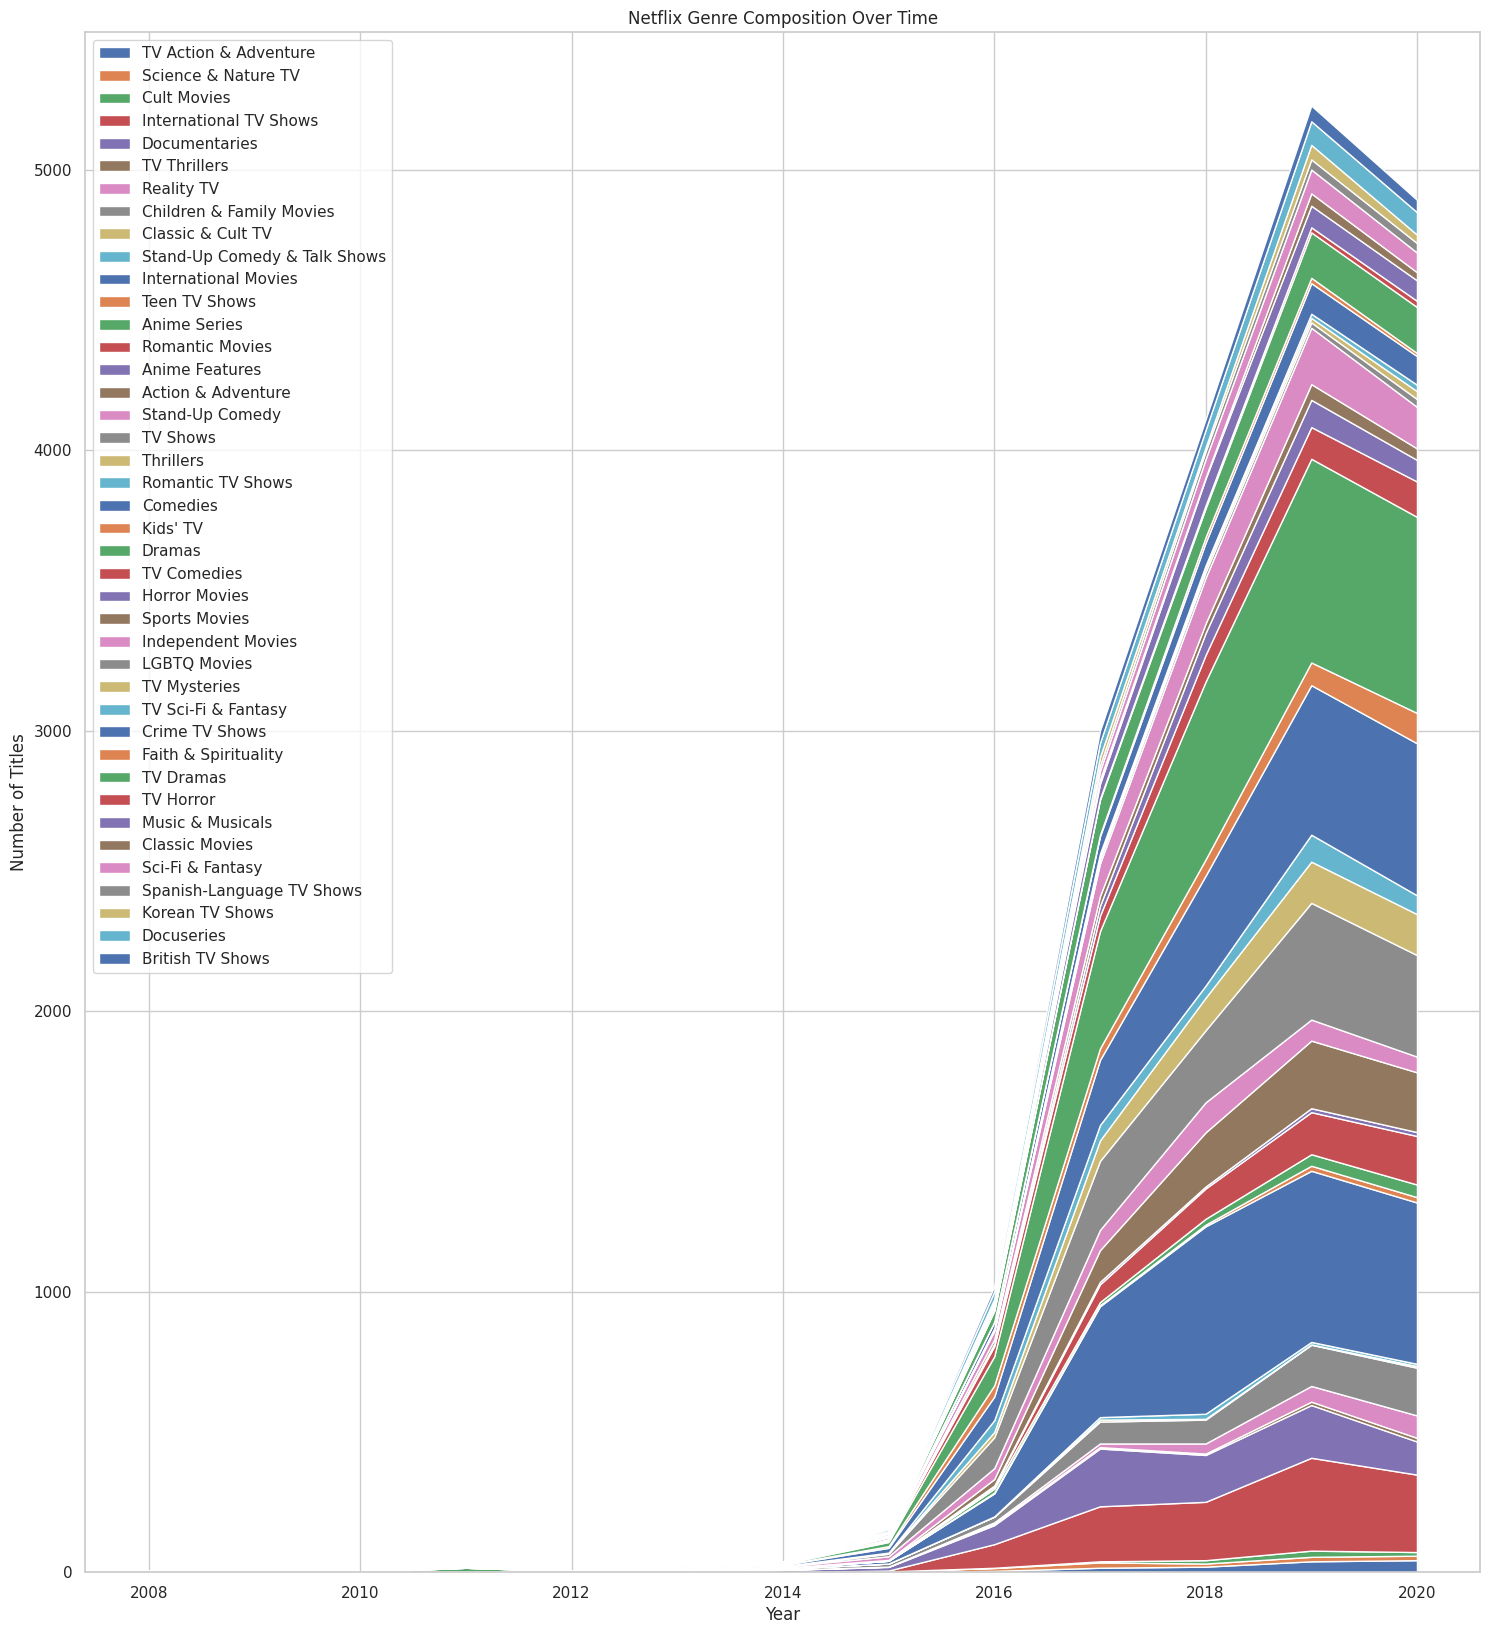

In [130]:
#creating a stacked area plot
plt.figure(figsize=(18, 20))
plt.stackplot(genre_counts_per_year.index, genre_counts_per_year.transpose(), labels=genre_counts_per_year.columns)
plt.title('Netflix Genre Composition Over Time')
plt.xlabel('Year')
plt.ylabel('Number of Titles')
plt.legend(loc='upper left')
plt.show()


In [176]:
!pip install openpyxl


writer = pd.ExcelWriter('netflix_analysis.xlsx', engine='openpyxl') # create a Pandas Excel writer using openpyxl as the engine.


data_2021.to_excel(writer, sheet_name='Summary_2021')  # writing each dataframe to a different worksheet.
genre_counts_per_year.to_excel(writer, sheet_name='Genre_Evolution')
emerging_genres.to_excel(writer, sheet_name='Emerging_Genres')

writer.close()

